In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('C:\\Users\\nilka\\OneDrive\\Desktop\\excelr\\self paced course\\data science assignment\\1.assignments\\4.simple linear regression\\delivery_time.csv')

In [3]:
data.head()

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DeliveryTime  21 non-null     float64
 1   SortingTime   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


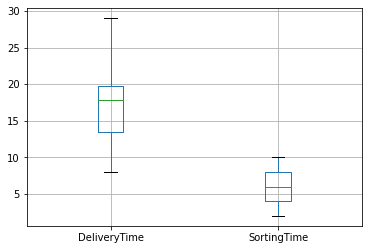

In [5]:
boxplot = data.boxplot(column=['DeliveryTime','SortingTime'])

In [6]:
data.describe()

,DeliveryTime,SortingTime
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


C:\Users\nilka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DeliveryTime', ylabel='Density'>

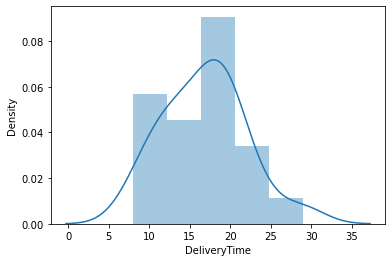

In [7]:
sns.distplot(data['DeliveryTime'])

C:\Users\nilka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SortingTime', ylabel='Density'>

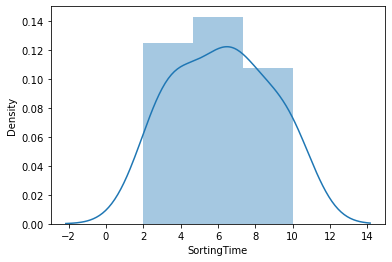

In [8]:
sns.distplot(data['SortingTime'])

Text(0, 0.5, 'DeliveryTime')

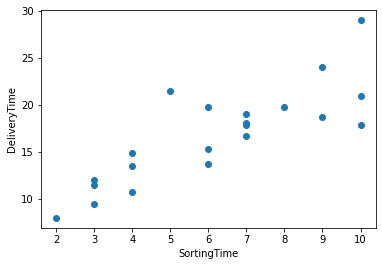

In [9]:
plt.scatter(data.SortingTime,data.DeliveryTime)
plt.xlabel('SortingTime')
plt.ylabel('DeliveryTime')

In [10]:
import statsmodels.formula.api as smf

In [11]:
model = smf.ols('DeliveryTime ~ SortingTime',data = data).fit()

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 19 Feb 2022   Prob (F-statistic):           3.98e-06
Time:                        15:42:48   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Transformation to improve the model

# Taking log for delivery time

In [13]:
data['log_DeliveryTime'] = np.log(data.DeliveryTime)
data

,DeliveryTime,SortingTime,log_DeliveryTime
0,21.00,10,3.044522
1,13.50,4,2.602690
2,19.75,6,2.983153
3,24.00,9,3.178054
4,29.00,10,3.367296
5,15.35,6,2.731115
6,19.00,7,2.944439
7,9.50,3,2.251292
8,17.90,10,2.884801
9,18.75,9,2.931194


Text(0, 0.5, 'log DeliveryTime')

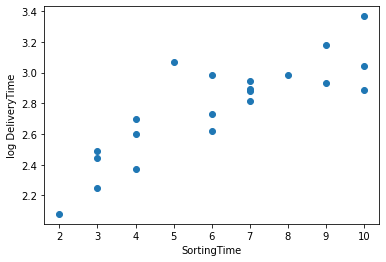

In [14]:
plt.scatter(data.SortingTime,data.log_DeliveryTime)
plt.xlabel('SortingTime')
plt.ylabel('log DeliveryTime')

In [15]:
model_exp = smf.ols('log_DeliveryTime ~ SortingTime',data = data).fit()

In [16]:
model_exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       log_DeliveryTime   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Sat, 19 Feb 2022   Prob (F-statistic):           1.59e-06
Time:                        15:42:48   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.1214      0.103     20.601      0.000       1.906       2.337
SortingTime     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Taking log for sorting time

In [17]:
data['log_sortingtime'] = np.log(data.SortingTime)
data

,DeliveryTime,SortingTime,log_DeliveryTime,log_sortingtime
0,21.00,10,3.044522,2.302585
1,13.50,4,2.602690,1.386294
2,19.75,6,2.983153,1.791759
3,24.00,9,3.178054,2.197225
4,29.00,10,3.367296,2.302585
5,15.35,6,2.731115,1.791759
6,19.00,7,2.944439,1.945910
7,9.50,3,2.251292,1.098612
8,17.90,10,2.884801,2.302585
9,18.75,9,2.931194,2.197225


Text(0, 0.5, 'Delivery Time')

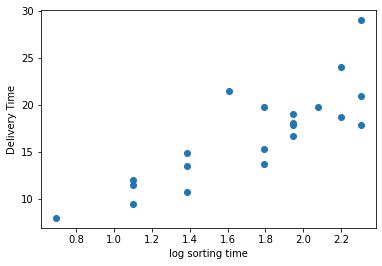

In [18]:
plt.scatter(data.log_sortingtime,data.DeliveryTime)
plt.xlabel('log sorting time')
plt.ylabel('Delivery Time')

In [19]:
model_log = smf.ols('DeliveryTime~log_sortingtime ', data = data).fit()

In [20]:
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 19 Feb 2022   Prob (F-statistic):           2.64e-06
Time:                        15:42:48   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.1597      2.455      0.472      0.642      -3.978       6.297
log_sortingtime     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Taking polynomial model

In [21]:
data['delivery_Time_sq'] = (data.DeliveryTime)*(data.DeliveryTime)
data

,DeliveryTime,SortingTime,log_DeliveryTime,log_sortingtime,delivery_Time_sq
0,21.00,10,3.044522,2.302585,441.0000
1,13.50,4,2.602690,1.386294,182.2500
2,19.75,6,2.983153,1.791759,390.0625
3,24.00,9,3.178054,2.197225,576.0000
4,29.00,10,3.367296,2.302585,841.0000
5,15.35,6,2.731115,1.791759,235.6225
6,19.00,7,2.944439,1.945910,361.0000
7,9.50,3,2.251292,1.098612,90.2500
8,17.90,10,2.884801,2.302585,320.4100
9,18.75,9,2.931194,2.197225,351.5625


Text(0, 0.5, 'Delivery Time square')

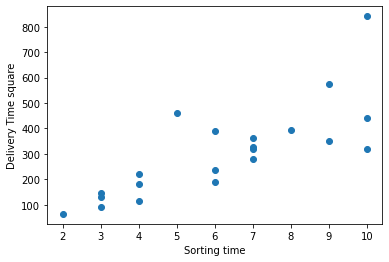

In [22]:
plt.scatter(data.SortingTime,data.delivery_Time_sq)
plt.xlabel('Sorting time')
plt.ylabel('Delivery Time square')

In [23]:
model_poly = smf.ols('delivery_Time_sq ~ SortingTime',data = data).fit()

In [24]:
model_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       delivery_Time_sq   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     28.82
Date:                Sat, 19 Feb 2022   Prob (F-statistic):           3.52e-05
Time:                        15:42:48   Log-Likelihood:                -128.87
No. Observations:                  21   AIC:                             261.7
Df Residuals:                      19   BIC:                             263.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -37.4401     69.013     -0.543      0.594    -181.887     107.007
SortingTime    55.5538     10.348      5.368      0.000      33.894      77.213
==============================================================================
Omnibus:                        9.930   Durbin-Watson:                   1.363
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                7.498
Skew:                           1.194   Prob(JB):                       0.0235
Kurtosis:                       4.694   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
print('R squared for basic model:',round(model.rsquared,3))
print('R squared for exponential model:',round(model_exp.rsquared,3))
print('R squared for logarithmic model:',round(model_log.rsquared,3))
print('R squared for polynomial model:',round(model_poly.rsquared,3))


R squared for basic model: 0.682
R squared for exponential model: 0.711
R squared for logarithmic model: 0.695
R squared for polynomial model: 0.603


In [ ]:
# Among all models created above exponential model has highest R squared value thus is considered best among all above

# so,  Delivery Time = exp(2.1212+(0.1056(Sorting Time)))